In [1]:
import pandas as pd
import numpy as np
import shap
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, InputSpec
from keras.utils import *
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
df =  pd.read_csv('D:\Project\project-ednn\Code\Final_dataset_Diabetes_Complication.csv')
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,3,1,1,1,1,1,1,1,3,1,...,1,3,1,2,2,1,2,2,1,2
1,5,3,1,1,2,4,2,1,5,1,...,1,2,2,2,2,2,2,2,1,1
2,4,1,1,1,2,1,2,2,2,2,...,2,3,1,2,2,2,2,2,2,1
3,4,1,1,1,2,4,2,1,1,1,...,2,3,2,2,2,2,1,2,1,2
4,2,1,1,3,1,3,1,1,1,1,...,1,3,1,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604073,3,1,1,1,1,4,1,1,1,1,...,1,3,2,2,2,2,2,2,2,2
604074,2,1,1,1,1,4,1,1,5,1,...,1,2,2,2,2,1,2,2,2,1
604075,1,2,1,1,1,3,1,1,2,1,...,1,3,1,2,2,2,2,2,2,1
604076,3,1,2,1,1,3,1,1,2,2,...,1,3,2,2,2,2,2,1,2,2


In [3]:
df = df.drop_duplicates(ignore_index=True)

In [4]:
scaler = MinMaxScaler()
scaler.fit(df)

# Transform the DataFrame to obtain the normalized data
df_normalized = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [5]:
data_normalize = pd.DataFrame(scaler.transform(df), columns=df.columns)
df_feature = data_normalize.iloc[:, :26]
df_label = data_normalize.iloc[:, 26:]

In [6]:
X = df_normalized.iloc[:, :26]
y = df_normalized.iloc[:, 26:]
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26
0,0.50,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.4,0.0,...,1.0,0.0,0.000000,0.333333,1.0,1.0,0.666667,0.0,1.0,0.0
1,1.00,1.0,0.0,0.000000,1.0,1.000000,1.0,0.0,0.8,0.0,...,1.0,0.0,0.285714,1.000000,0.5,1.0,0.000000,0.0,0.5,1.0
2,0.75,0.0,0.0,0.000000,1.0,0.000000,1.0,1.0,0.2,0.5,...,1.0,0.0,0.000000,0.333333,0.0,1.0,0.666667,1.0,1.0,0.0
3,0.75,0.0,0.0,0.000000,1.0,1.000000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.000000,1.000000,1.0,0.0,0.666667,1.0,1.0,1.0
4,0.25,0.0,0.0,0.666667,0.0,0.666667,0.0,0.0,0.0,0.0,...,1.0,0.0,0.000000,0.333333,0.0,1.0,0.666667,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543770,0.00,0.0,1.0,0.000000,0.0,1.000000,0.0,0.0,0.8,0.5,...,1.0,0.0,1.000000,0.333333,0.0,1.0,0.666667,1.0,1.0,0.0
543771,0.25,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.8,0.0,...,0.0,0.0,0.142857,1.000000,0.5,0.0,0.000000,0.0,0.5,1.0
543772,0.00,0.5,0.0,0.000000,0.0,0.666667,0.0,0.0,0.2,0.0,...,1.0,1.0,0.000000,0.333333,1.0,0.0,0.666667,0.0,1.0,0.0
543773,0.50,0.0,1.0,0.000000,0.0,0.666667,0.0,0.0,0.2,0.5,...,1.0,0.0,0.000000,0.666667,0.5,1.0,0.666667,0.0,1.0,1.0


In [7]:
# model = Sequential([
#     tf.keras.layers.Input(shape=26),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(8, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
weight_list = []
for i, label in enumerate(df_label.columns):
    values_1 = df_label[label][df_label[label] == 1]
    values_2 = df_label[label][df_label[label] == 2]
    dist = 1 - (len(values_1) / len(df_label))
    weight_list.append(dist)

In [9]:
class DNNModelwithWeightedDropout(tf.keras.Model):
    def __init__(self, num_features=26, num_classes=7, p=[0.05, 0.01, 0.003]):
        super(DNNModelwithWeightedDropout, self).__init__()
        self.fcn1 = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='relu', input_shape=(num_features,)),
            tf.keras.layers.Dense(len(p), activation='softmax')
        ])
        self.dropout = [tf.keras.layers.Dropout(rate=rate) for rate in p]
        self.fcn2 = tf.keras.Sequential([
            tf.keras.layers.Dense(num_classes, activation='sigmoid')
        ])

    def call(self, x, training=None, mask=None):
        x = self.fcn1(x)
        weights = x

        # Apply weighted dropout
        x = [dropout(x[:, i], training=training) * weights[:, i] for i, dropout in enumerate(self.dropout)]

        x = tf.stack(x, axis=1)
        x = self.fcn2(x)
        return x

In [10]:
def ProposedModel1(n_inputs, n_outputs, dropout_rate=[0.3]*3):
    model = DNNModelwithWeightedDropout(num_features=n_inputs, num_classes=n_outputs, p=dropout_rate)
    lossWeights = weight_list
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.003), metrics=['accuracy'], loss_weights=lossWeights)

    return model

In [11]:
model = ProposedModel1(26, 1)

In [15]:
features = df.iloc[:, :26].columns
labels = df.iloc[:, 26:].columns.to_list()
labels

['Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7']

In [20]:
for i in range(7):
    X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:, i], test_size = 0.2, random_state=1)
    model.fit(X_train, y_train, 
            epochs=5, 
            batch_size=32,
            validation_data=(X_test, y_test),
            verbose=0
            )
    model.save(f'Results/ProposedModelLabel_{i}.keras', save_format='tf')


NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

In [ ]:
features = df.iloc[:, :26].columns
labels = df.iloc[:, 26:].columns.to_list()
labels

['Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7']

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


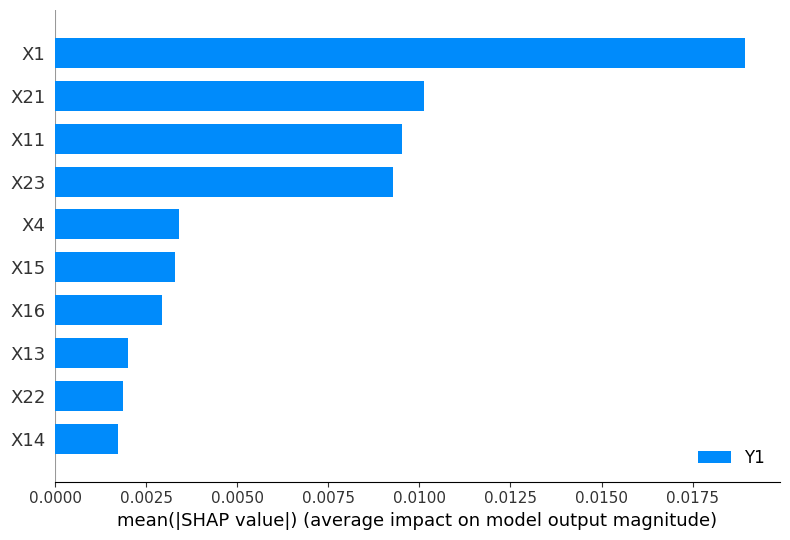

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


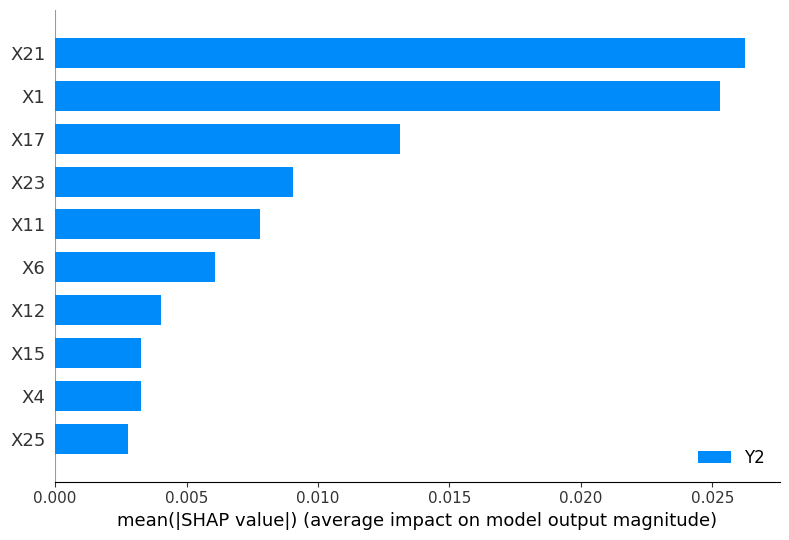

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


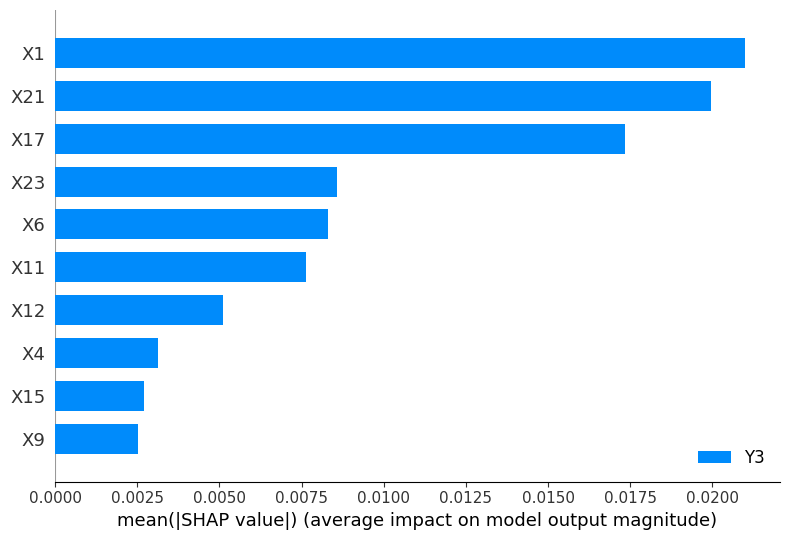

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


KeyboardInterrupt: 

In [ ]:
for i in range(7):
    X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:, i], test_size = 0.2, random_state=1)
    newModel = tf.keras.models.load_model(f'Results/ProposedModelLabel_{i}.keras')
    explainer = shap.DeepExplainer(newModel, X_train.to_numpy())
    shap_values = explainer.shap_values(X_test.to_numpy()[:1000])
    shap.summary_plot(shap_values, X_test.to_numpy()[:1000], class_names=labels, feature_names=features, max_display=10)
    labels.pop(0)